In [54]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns
from sklearn.cluster import KMeans

sales = pd.read_csv('wrangler_elantra_2018.csv')
sales

,Month.Numeric,Month.Factor,Year,Wrangler.Sales,Elantra.Sales,Unemployment.Rate,Wrangler.Queries,Elantra.Queries,CPI.All,CPI.Energy
0,1,January,2010,4888,7690,9.8,32,9,217.488,212.807
1,2,February,2010,5967,7966,9.8,35,10,217.281,209.624
2,3,March,2010,8410,8225,9.9,35,10,217.353,209.326
3,4,April,2010,8327,9657,9.9,38,10,217.403,209.219
4,5,May,2010,9634,9781,9.6,38,11,217.290,206.631
...,...,...,...,...,...,...,...,...,...,...
103,8,August,2018,20168,15474,3.8,89,27,251.846,222.368
104,9,September,2018,15983,19923,3.7,80,24,251.994,221.334
105,10,October,2018,13318,18312,3.8,75,23,252.827,226.644
106,11,November,2018,15963,18148,3.7,76,23,252.876,221.712


In [55]:
#build linear regression model with dependent variable as sales and the five following independent variables

X = sales[['Year','Unemployment.Rate', 'Wrangler.Queries', 'CPI.Energy', 'CPI.All']]
y = sales[['Wrangler.Sales']]

reg = LinearRegression().fit(X,y)
intercept = reg.intercept_
coefs = reg.coef_

#Get intercept and coefficients of the variables to help build regression equation for the model
print(intercept)
print(coefs)


[2989378.8089949]
[[-1492.37802408 -1122.63447      310.31513553    34.93196146
     44.16375279]]


In [56]:
#Find r-squared value of model
y_pred = reg.predict(X)
r2 = r2_score(y,y_pred)
print(r2)

0.7317666741982172


In [57]:
#Trying to improve model by modeling seasonality
X = X.join(pd.get_dummies(sales['Month.Factor']))

reg = LinearRegression().fit(X,y)
intercept = reg.intercept_
coefs = reg.coef_

print(intercept)
print(coefs)

#r-squared is improved with seasonality added to model
y_pred = reg.predict(X)
r2 = r2_score(y,y_pred)
print(r2)

[11349377.41973118]
[[-5760.28805072 -2016.45095814   117.67054937   -83.37171019
   1234.54636291  3309.45198028     6.97346138 -2678.429513
   -304.68188806 -1172.04842236   883.18282208  1974.5271118
   3111.7542559   3681.30400877 -3992.4815727  -2916.72861025
  -1902.82363384]]
0.8531033553813926


In [58]:
#only want year, elantra sales, and wrangler sales in this
sales_small = sales[['Year', 'Elantra.Sales', 'Wrangler.Sales']]
sales_small

,Year,Elantra.Sales,Wrangler.Sales
0,2010,7690,4888
1,2010,7966,5967
2,2010,8225,8410
3,2010,9657,8327
4,2010,9781,9634
...,...,...,...
103,2018,15474,20168
104,2018,19923,15983
105,2018,18312,13318
106,2018,18148,15963


[Text(0.5, 0, 'Wrangler Sales'),
 Text(0, 0.5, 'Elantra Sales'),
 Text(0.5, 1.0, 'Elantra vs Wrangler Sales over the years')]

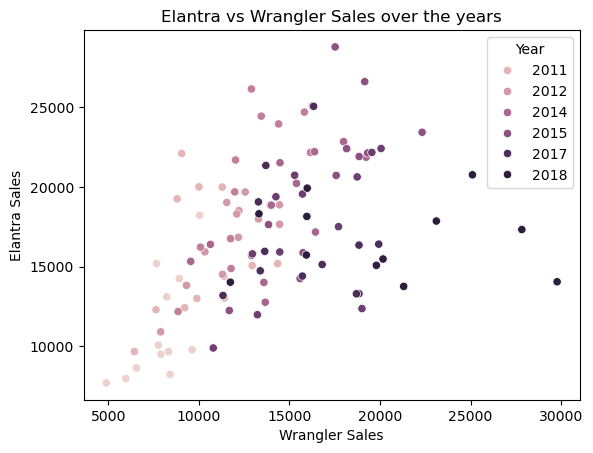

In [73]:
#Create scatterplot of elantra sales against wrangler sales and color by year variable
E_vs_W_scatter = sns.scatterplot(data = sales_small, x = 'Wrangler.Sales', y = 'Elantra.Sales', hue = 'Year')
E_vs_W_scatter.set(xlabel = 'Wrangler Sales', ylabel = 'Elantra Sales', title = 'Elantra vs Wrangler Sales over the years')


/var/folders/hc/zwth2m5x79q31wxczlmqc4400000gn/T/ipykernel_12064/3431675392.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_small['labels']=kmeans.labels_


[Text(0.5, 0, 'Wrangler Sales'),
 Text(0, 0.5, 'Elantra Sales'),
 Text(0.5, 1.0, 'Elantra vs Wrangler Sales Clustered')]

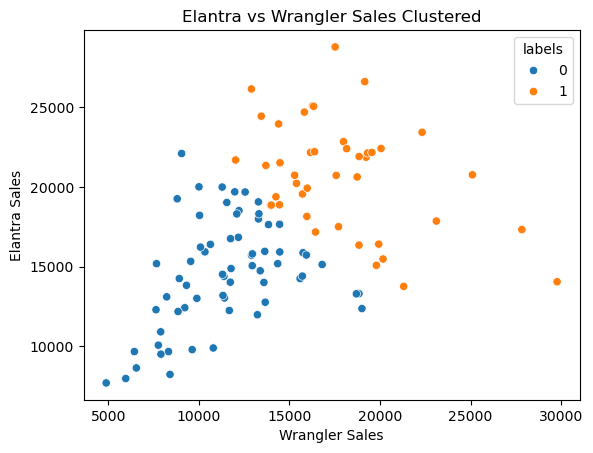

In [87]:
#find the two cluster centers
kmeans = KMeans(n_clusters = 2, random_state = 0).fit(sales_small)
kmeans.cluster_centers_

sales_small['labels']=kmeans.labels_

#scatter plot of elantra sales against wrangler sales and color by the cluster they belong to
fig2 = sns.scatterplot(data = sales_small, x = 'Wrangler.Sales', y = 'Elantra.Sales', hue = 'labels')
fig2.set(xlabel = 'Wrangler Sales', ylabel = 'Elantra Sales', title = 'Elantra vs Wrangler Sales Clustered')